In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data = pd.read_csv('fina_comb.csv')

In [0]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'YEAR', 'MONTH', 'DAY_OF_MONTH',
       'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN', 'ORIGIN_STATE_ABR', 'DEST_AIRPORT_ID', 'DEST',
       'DEST_STATE_ABR', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'ARR_TIME',
       'ARR_DELAY', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')

In [0]:
data.drop(['Unnamed: 0', 'Unnamed: 0.1'],axis=1,inplace=True)

In [0]:
data.drop(['ORIGIN_STATE_ABR','ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID','DEST_STATE_ABR'],axis=1,inplace=True)

In [0]:
data.drop(['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY'],axis=1,inplace=True)

In [0]:
data.drop(['ORIGIN_AIRPORT_SEQ_ID','ORIGIN_CITY_MARKET_ID'],axis=1,inplace=True)

In [0]:
data.columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'ARR_TIME', 'ARR_DELAY', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE'],
      dtype='object')

In [0]:
len(data)

136656

In [0]:
data.dropna(subset = ['OP_UNIQUE_CARRIER','ORIGIN','DEST','CRS_DEP_TIME','ARR_TIME',
                      'ARR_DELAY','CRS_ELAPSED_TIME','DISTANCE'],inplace=True)

In [0]:
data['DEP_HOUR'] = data['CRS_DEP_TIME'].apply(lambda x:int(str(x)[:2]) if x>999 else int(str(x)[:1] if x>99 else 0))

In [0]:
data['ARR_HOUR'] = data['ARR_TIME'].apply(lambda x:int(str(x)[:2]) if x>999 else int(str(x)[:1] if x>99 else 0))
data['ARR_HOUR'] = data['ARR_HOUR'].apply(lambda x:0 if x==24 else x)

In [0]:
len(data)

134632

In [0]:
#top = pd.read_csv('top_50.csv')

In [0]:
#top = top.drop(top.index[0:3])

In [0]:
#top

In [0]:
#top50_airport = top['Unnamed: 1'].tolist()
#data_sub = data[data['ORIGIN'].isin(top50_airport)]
#data_sub = data_sub[data_sub['DEST'].isin(top50_airport)]

In [0]:
data_sub = data

In [0]:
data

YEAR  MONTH  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER  \
0       2013      1            18            5                DL   
1       2013      1            18            5                DL   
2       2013      1            18            5                DL   
3       2013      1            18            5                DL   
4       2013      1            18            5                DL   
5       2013      1            18            5                DL   
6       2013      1            18            5                DL   
7       2013      1            18            5                DL   
8       2013      1            18            5                DL   
9       2013      1            18            5                DL   
10      2013      1            18            5                DL   
11      2013      1            18            5                DL   
12      2013      1            18            5                DL   
13      2013      1            18            5                DL   
14      2013      1            18            5                DL   
15      2013      1            18            5                DL   
16      2013      1            18            5                DL   
17      2013      1            18            5                DL   
18      2013      1            18            5                DL   
19      2013      1            18            5                DL   
20      2013      1            18            5                DL   
21      2013      1            18            5                DL   
22      2013      1            18            5                DL   
23      2013      1            18            5                DL   
24      2013      1            18            5                DL   
25      2013      1            18            5                DL   
26      2013      1            18            5                DL   
27      2013      1            18            5                DL   
28      2013      1            18            5                DL   
29      2013      1            18            5                DL   
...      ...    ...           ...          ...               ...   
136625  2013      1             1            2                DL   
136626  2013      1             1            2                DL   
136627  2013      1             1            2                DL   
136628  2013      1             1            2                DL   
136629  2013      1             1            2                DL   
136630  2013      1             1            2                DL   
136631  2013      1             1            2                DL   
136632  2013      1             1            2                DL   
136633  2013      1             1            2                DL   
136634  2013      1             1            2                DL   
136635  2013      1             1            2                DL   
136636  2013      1             1            2                DL   
136637  2013      1             1            2                DL   
136638  2013      1             1            2                DL   
136639  2013      1             1            2                DL   
136640  2013      1             1            2                DL   
136641  2013      1             1            2                DL   
136642  2013      1             1            2                DL   
136643  2013      1             1            2                DL   
136644  2013      1             1            2                DL   
136645  2013      1             1            2                DL   
136646  2013      1             1            2                DL   
136647  2013      1             1            2                DL   
136648  2013      1             1            2                DL   
136649  2013      1             1            2                DL   
136650  2013      1             1            2                DL   
136651  2013      1             1            2                DL

In [0]:
df_weather = pd.read_csv('weather.csv',low_memory=False)

In [0]:
df_weather.columns

Index(['STATION', 'STATION_NAME', 'ELEVATION', 'LATITUDE', 'LONGITUDE', 'DATE',
       'REPORTTPYE', 'HOURLYSKYCONDITIONS', 'HOURLYVISIBILITY',
       'HOURLYPRSENTWEATHERTYPE', 'HOURLYDRYBULBTEMPF', 'HOURLYDRYBULBTEMPC',
       'HOURLYWETBULBTEMPF', 'HOURLYWETBULBTEMPC', 'HOURLYDewPointTempF',
       'HOURLYDewPointTempC', 'HOURLYRelativeHumidity', 'HOURLYWindSpeed',
       'HOURLYWindDirection', 'HOURLYWindGustSpeed', 'HOURLYStationPressure',
       'HOURLYPressureTendency', 'HOURLYPressureChange',
       'HOURLYSeaLevelPressure', 'HOURLYPrecip', 'HOURLYAltimeterSetting',
       'DAILYMaximumDryBulbTemp', 'DAILYMinimumDryBulbTemp',
       'DAILYAverageDryBulbTemp', 'DAILYDeptFromNormalAverageTemp',
       'DAILYAverageRelativeHumidity', 'DAILYAverageDewPointTemp',
       'DAILYAverageWetBulbTemp', 'DAILYHeatingDegreeDays',
       'DAILYCoolingDegreeDays', 'DAILYSunrise', 'DAILYSunset', 'DAILYWeather',
       'DAILYPrecip', 'DAILYSnowfall', 'DAILYSnowDepth',
       'DAILYAverageStatio

In [0]:
df_weather['STATION_NAME'].value_counts()

CHICAGO OHARE INTERNATIONAL AIRPORT IL US         9108
ATLANTA HARTSFIELD INTERNATIONAL AIRPORT GA US    8377
LOS ANGELES INTERNATIONAL AIRPORT CA US           7890
SAN FRANCISCO INTERNATIONAL AIRPORT CA US         7581
JFK INTERNATIONAL AIRPORT NY US                   5678
Name: STATION_NAME, dtype: int64

In [0]:
df_weather =df_weather[['STATION_NAME','DATE','HOURLYVISIBILITY','HOURLYDRYBULBTEMPC','HOURLYWindSpeed','HOURLYPrecip']].copy()

In [0]:
df_weather

STATION_NAME              DATE  \
0                     JFK INTERNATIONAL AIRPORT NY US  01-01-2013 00:51   
1                     JFK INTERNATIONAL AIRPORT NY US  01-01-2013 01:00   
2                     JFK INTERNATIONAL AIRPORT NY US  01-01-2013 01:51   
3                     JFK INTERNATIONAL AIRPORT NY US  01-01-2013 02:51   
4                     JFK INTERNATIONAL AIRPORT NY US  01-01-2013 03:51   
5                     JFK INTERNATIONAL AIRPORT NY US  01-01-2013 04:00   
6                     JFK INTERNATIONAL AIRPORT NY US  01-01-2013 04:51   
7                     JFK INTERNATIONAL AIRPORT NY US  01-01-2013 05:51   
8                     JFK INTERNATIONAL AIRPORT NY US  01-01-2013 06:51   
9                     JFK INTERNATIONAL AIRPORT NY US  01-01-2013 07:00   
10                    JFK INTERNATIONAL AIRPORT NY US  01-01-2013 07:51   
11                    JFK INTERNATIONAL AIRPORT NY US  01-01-2013 08:51   
12                    JFK INTERNATIONAL AIRPORT NY US  01-01-2013 09:51   
13                    JFK INTERNATIONAL AIRPORT NY US  01-01-2013 10:00   
14                    JFK INTERNATIONAL AIRPORT NY US  01-01-2013 10:51   
15                    JFK INTERNATIONAL AIRPORT NY US  01-01-2013 11:51   
16                    JFK INTERNATIONAL AIRPORT NY US  01-01-2013 12:51   
17                    JFK INTERNATIONAL AIRPORT NY US  01-01-2013 13:00   
18                    JFK INTERNATIONAL AIRPORT NY US  01-01-2013 13:02   
19                    JFK INTERNATIONAL AIRPORT NY US  01-01-2013 13:51   
20                    JFK INTERNATIONAL AIRPORT NY US  01-01-2013 14:51   
21                    JFK INTERNATIONAL AIRPORT NY US  01-01-2013 15:51   
22                    JFK INTERNATIONAL AIRPORT NY US  01-01-2013 16:00   
23                    JFK INTERNATIONAL AIRPORT NY US  01-01-2013 16:51   
24                    JFK INTERNATIONAL AIRPORT NY US  01-01-2013 17:51   
25                    JFK INTERNATIONAL AIRPORT NY US  01-01-2013 18:51   
26                    JFK INTERNATIONAL AIRPORT NY US  01-01-2013 19:00   
27                    JFK INTERNATIONAL AIRPORT NY US  01-01-2013 19:51   
28                    JFK INTERNATIONAL AIRPORT NY US  01-01-2013 20:51   
29                    JFK INTERNATIONAL AIRPORT NY US  01-01-2013 21:51   
...                                               ...               ...   
38604  ATLANTA HARTSFIELD INTERNATIONAL AIRPORT GA US  28-02-2016 23:59   
38605  ATLANTA HARTSFIELD INTERNATIONAL AIRPORT GA US  29-02-2016 00:52   
38606  ATLANTA HARTSFIELD INTERNATIONAL AIRPORT GA US  29-02-2016 01:00   
38607  ATLANTA HARTSFIELD INTERNATIONAL AIRPORT GA US  29-02-2016 01:52   
38608  ATLANTA HARTSFIELD INTERNATIONAL AIRPORT GA US  29-02-2016 02:52   
38609  ATLANTA HARTSFIELD INTERNATIONAL AIRPORT GA US  29-02-2016 03:52   
38610  ATLANTA HARTSFIELD INTERNATIONAL AIRPORT GA US  29-02-2016 04:52   
38611  ATLANTA HARTSFIELD INTERNATIONAL AIRPORT GA US  29-02-2016 05:52   
38612  ATLANTA HARTSFIELD INTERNATIONAL AIRPORT GA US  29-02-2016 06:52   
38613  ATLANTA HARTSFIELD INTERNATIONAL AIRPORT GA US  29-02-2016 07:00   
38614  ATLANTA HARTSFIELD INTERNATIONAL AIRPORT GA US  29-02-2016 07:52   
38615  ATLANTA HARTSFIELD INTERNATIONAL AIRPORT GA US  29-02-2016 08:52   
38616  ATLANTA HARTSFIELD INTERNATIONAL AIRPORT GA US  29-02-2016 09:52   
38617  ATLANTA HARTSFIELD INTERNATIONAL AIRPORT GA US  29-02-2016 10:52   
38618  ATLANTA HARTSFIELD INTERNATIONAL AIRPORT GA US  29-02-2016 11:52   
38619  ATLANTA HARTSFIELD INTERNATIONAL AIRPORT GA US  29-02-2016 12:52   
38620  ATLANTA HARTSFIELD INTERNATIONAL AIRPORT GA US  29-02-2016 13:00   
38621  ATLANTA HARTSFIELD INTERNATIONAL AIRPORT GA US  29-02-2016 13:52   
38622  ATLANTA HARTSFIELD INTERNATIONAL AIRPORT GA US  29-02-2016 14:52   
38623  ATLANTA HARTSFIELD INTERNATIONAL AIRPORT GA US  29-02-2016 15:52   
38624  ATLANTA HARTSFIELD INTERNATIONAL AIRPORT GA US  29-02-2016 16:52   
38625  ATLANTA HARTSFIELD INTERNATIONAL AIRPORT GA US  29-02-2016 

In [0]:
df_weather['STATION_NAME'].replace('ATLANTA HARTSFIELD INTERNATIONAL AIRPORT GA US','ATL',inplace=True)
df_weather['STATION_NAME'].replace('CHICAGO OHARE INTERNATIONAL AIRPORT IL US','ORD',inplace=True)
df_weather['STATION_NAME'].replace('LOS ANGELES INTERNATIONAL AIRPORT CA US','LAX',inplace=True)
df_weather['STATION_NAME'].replace('SAN FRANCISCO INTERNATIONAL AIRPORT CA US','SFO',inplace=True)
df_weather['STATION_NAME'].replace('JFK INTERNATIONAL AIRPORT NY US','JFK',inplace=True)


In [0]:
df_weather

STATION_NAME              DATE HOURLYVISIBILITY  HOURLYDRYBULBTEMPC  \
0              JFK  01-01-2013 00:51               10                 4.4   
1              JFK  01-01-2013 01:00             9.94                 4.4   
2              JFK  01-01-2013 01:51               10                 3.9   
3              JFK  01-01-2013 02:51               10                 3.9   
4              JFK  01-01-2013 03:51               10                 4.4   
5              JFK  01-01-2013 04:00             9.94                 4.4   
6              JFK  01-01-2013 04:51               10                 4.4   
7              JFK  01-01-2013 05:51               10                 3.9   
8              JFK  01-01-2013 06:51               10                 3.3   
9              JFK  01-01-2013 07:00             9.94                 3.3   
10             JFK  01-01-2013 07:51               10                 3.9   
11             JFK  01-01-2013 08:51               10                 4.4   
12             JFK  01-01-2013 09:51               10                 4.4   
13             JFK  01-01-2013 10:00             9.94                 4.4   
14             JFK  01-01-2013 10:51               10                 5.0   
15             JFK  01-01-2013 11:51               10                 5.0   
16             JFK  01-01-2013 12:51               10                 4.4   
17             JFK  01-01-2013 13:00             9.94                 4.4   
18             JFK  01-01-2013 13:02               10                 3.0   
19             JFK  01-01-2013 13:51               10                 3.3   
20             JFK  01-01-2013 14:51               10                 3.9   
21             JFK  01-01-2013 15:51               10                 3.9   
22             JFK  01-01-2013 16:00             9.94                 3.9   
23             JFK  01-01-2013 16:51               10                 3.3   
24             JFK  01-01-2013 17:51               10                 2.8   
25             JFK  01-01-2013 18:51               10                 1.7   
26             JFK  01-01-2013 19:00             9.94                 1.7   
27             JFK  01-01-2013 19:51               10                 0.6   
28             JFK  01-01-2013 20:51               10                 0.0   
29             JFK  01-01-2013 21:51               10                -1.1   
...            ...               ...              ...                 ...   
38604          ATL  28-02-2016 23:59              NaN                 NaN   
38605          ATL  29-02-2016 00:52               10                12.8   
38606          ATL  29-02-2016 01:00              NaN                12.8   
38607          ATL  29-02-2016 01:52               10                12.2   
38608          ATL  29-02-2016 02:52               10                11.1   
38609          ATL  29-02-2016 03:52               10                11.1   
38610          ATL  29-02-2016 04:52               10                10.6   
38611          ATL  29-02-2016 05:52               10                10.0   
38612          ATL  29-02-2016 06:52               10                10.6   
38613          ATL  29-02-2016 07:00              NaN                10.6   
38614          ATL  29-02-2016 07:52               10                10.6   
38615          ATL  29-02-2016 08:52               10                12.8   
38616          ATL  29-02-2016 09:52               10                15.0   
38617          ATL  29-02-2016 10:52               10                16.7   
38618          ATL  29-02-2016 11:52               10                18.3   
38619          ATL  29-02-2016 12:52               10                20.0   
38620          ATL  29-02-2016 13:00              NaN                20.0   
38621          ATL  29-02-2016 13:52               10                19.4   
38622          ATL  29-02-2016 14:52               10                21.7   
38623          ATL  29-02-2016 15:52               10                21.7   
38

In [0]:
def tryconvert(x):
        try:
            if str(x)[-1].isalpha():
                return(float(str(x)[:-1]))
            else:
                return(float(str(x)))
        except:
            return(np.nan)

#Get the Year, Month, Date and Hour from df_weather
#Delete duplicate rows with data from the same station and same date/hour
#Delete "DATE"

df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

df_weather['YEAR']= df_weather['DATE'].apply(lambda time: time.year)
df_weather['MONTH']= df_weather['DATE'].apply(lambda time: time.month)
df_weather['DAY_OF_MONTH']= df_weather['DATE'].apply(lambda time: time.day)
df_weather['HOUR']= df_weather['DATE'].apply(lambda time: time.hour)

df_weather.drop_duplicates(['STATION_NAME','YEAR','MONTH','DAY_OF_MONTH','HOUR'],inplace=True)
df_weather.drop('DATE',axis = 1,inplace=True)

df_weather['HOURLYVISIBILITY'] = df_weather['HOURLYVISIBILITY'].apply(lambda x: tryconvert(x))
df_weather['HOURLYDRYBULBTEMPC'] = df_weather['HOURLYDRYBULBTEMPC'].apply(lambda x: tryconvert(x))
df_weather['HOURLYWindSpeed'] = df_weather['HOURLYWindSpeed'].apply(lambda x: tryconvert(x))
df_weather['HOURLYPrecip'] = df_weather['HOURLYPrecip'].apply(lambda x: tryconvert(x))

#Replace NaNs with 0 in Hourly Precip
df_weather['HOURLYPrecip'].fillna(value=0,inplace=True)
#Replace NaNs with average value for Hourly Visibility
df_weather['HOURLYVISIBILITY'].fillna(df_weather['HOURLYVISIBILITY'].mean(),inplace=True)

In [0]:
df_weather['STATION_NAME'].value_counts()

ATL    5688
ORD    5688
SFO    5664
LAX    5624
JFK    3668
Name: STATION_NAME, dtype: int64

In [0]:
df_weather['HOURLYVISIBILITY'].value_counts()

10.000000    16277
8.873032      3565
9.940000      1067
9.000000       934
8.000000       733
7.000000       538
6.000000       479
5.000000       384
3.000000       375
4.000000       347
2.000000       261
2.500000       207
0.500000       187
0.250000       160
1.000000       155
1.500000       147
0.750000       100
8.700000        59
1.750000        42
1.250000        41
7.460000        38
0.120000        38
5.590000        36
6.840000        30
3.730000        28
0.000000        23
4.970000        23
2.980000        17
1.990000        12
0.990000        11
1.490000         8
2.490000         8
0.060000         1
1.240000         1
Name: HOURLYVISIBILITY, dtype: int64

In [0]:
df_avg_DEP = df_weather.groupby('STATION_NAME').mean()
df_avg_DEP.drop(['YEAR','MONTH','DAY_OF_MONTH','HOUR'],axis = 1,inplace=True)
df_avg_DEP.reset_index(drop=False,inplace=True)
df_avg_DEP.rename(index=str, columns={"STATION_NAME": "ORIGIN"},inplace=True)
df_avg_DEP.rename(index=str, columns={"HOURLYVISIBILITY": "DEP_AVG_HOURLYVISIBILITY"},inplace=True)
df_avg_DEP.rename(index=str, columns={"HOURLYDRYBULBTEMPC": "DEP_AVG_HOURLYDRYBULBTEMPC"},inplace=True)
df_avg_DEP.rename(index=str, columns={"HOURLYWindSpeed": "DEP_AVG_HOURLYWindSpeed"},inplace=True)
df_avg_DEP.rename(index=str, columns={"HOURLYPrecip": "DEP_AVG_HOURLYPrecip"},inplace=True)

df_avg_ARR = df_weather.groupby('STATION_NAME').mean()
df_avg_ARR.drop(['YEAR','MONTH','DAY_OF_MONTH','HOUR'],axis = 1,inplace=True)
df_avg_ARR.reset_index(drop=False,inplace=True)
df_avg_ARR.rename(index=str, columns={"STATION_NAME": "DEST"},inplace=True)
df_avg_ARR.rename(index=str, columns={"HOURLYVISIBILITY": "ARR_AVG_HOURLYVISIBILITY"},inplace=True)
df_avg_ARR.rename(index=str, columns={"HOURLYDRYBULBTEMPC": "ARR_AVG_HOURLYDRYBULBTEMPC"},inplace=True)
df_avg_ARR.rename(index=str, columns={"HOURLYWindSpeed": "ARR_AVG_HOURLYWindSpeed"},inplace=True)
df_avg_ARR.rename(index=str, columns={"HOURLYPrecip": "ARR_AVG_HOURLYPrecip"},inplace=True)

In [0]:
df_weather_origin = df_weather.copy()
df_weather_dest = df_weather.copy()
del df_weather

#Rename the Columns, add DEP_ to each column name and STATION_NAME to ORIGIN
df_weather_origin.rename(index=str, columns={"STATION_NAME": "ORIGIN"},inplace=True)
df_weather_origin.rename(index=str, columns={"HOURLYVISIBILITY": "DEP_HOURLYVISIBILITY"},inplace=True)
df_weather_origin.rename(index=str, columns={"HOURLYDRYBULBTEMPC": "DEP_HOURLYDRYBULBTEMPC"},inplace=True)
df_weather_origin.rename(index=str, columns={"HOURLYWindSpeed": "DEP_HOURLYWindSpeed"},inplace=True)
df_weather_origin.rename(index=str, columns={"HOURLYPrecip": "DEP_HOURLYPrecip"},inplace=True)
df_weather_origin.rename(index=str, columns={"HOUR": "DEP_HOUR"},inplace=True)

#Rename the Columns, add ARR_ to each column name and STATION_NAME to DEST
df_weather_dest.rename(index=str, columns={"STATION_NAME": "DEST"},inplace=True)
df_weather_dest.rename(index=str, columns={"HOURLYVISIBILITY": "ARR_HOURLYVISIBILITY"},inplace=True)
df_weather_dest.rename(index=str, columns={"HOURLYDRYBULBTEMPC": "ARR_HOURLYDRYBULBTEMPC"},inplace=True)
df_weather_dest.rename(index=str, columns={"HOURLYWindSpeed": "ARR_HOURLYWindSpeed"},inplace=True)
df_weather_dest.rename(index=str, columns={"HOURLYPrecip": "ARR_HOURLYPrecip"},inplace=True)
df_weather_dest.rename(index=str, columns={"HOUR": "ARR_HOUR"},inplace=True)

In [0]:
data_sub = pd.merge(data_sub, df_weather_origin, on=['ORIGIN','YEAR','MONTH','DAY_OF_MONTH','DEP_HOUR'], how='left')
data_sub = pd.merge(data_sub, df_weather_dest, on=['DEST','YEAR','MONTH','DAY_OF_MONTH','ARR_HOUR'], how='left')

In [0]:
data_sub = pd.merge(data_sub,df_avg_DEP,how='left',on='ORIGIN')
data_sub = pd.merge(data_sub,df_avg_ARR,how='left',on='DEST')

In [0]:
len(data_sub)

134632

In [0]:
data_sub.to_csv('AA.csv',index=False)

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'AA.csv'})
uploaded.SetContentFile('AA.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

In [0]:
df = pd.read_csv('AA.csv')

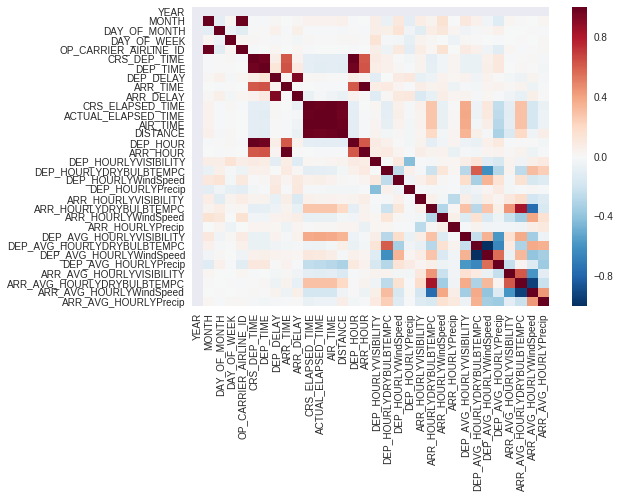

In [0]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [0]:
#Drop Variables which do not have correlation with arrival delays/cannot be predicted until the flight
df.drop(['YEAR','DAY_OF_MONTH','OP_CARRIER_AIRLINE_ID','CRS_DEP_TIME','DEP_TIME','DEP_DELAY','ARR_TIME',
         'ARR_TIME','ACTUAL_ELAPSED_TIME','AIR_TIME','DEP_AVG_HOURLYVISIBILITY',
         'DEP_AVG_HOURLYDRYBULBTEMPC','DEP_AVG_HOURLYWindSpeed',
         'DEP_AVG_HOURLYPrecip','ARR_AVG_HOURLYVISIBILITY',
         'ARR_AVG_HOURLYDRYBULBTEMPC','ARR_AVG_HOURLYWindSpeed','ARR_AVG_HOURLYPrecip'],axis=1, inplace=True)
#Remove data redundancy
df['ARR_HOUR'] = df['ARR_HOUR'].apply(lambda x:0 if x == 24 else x)
#Drop rows with Null Values
df.dropna(inplace=True)



In [0]:
df['ARR_HOURLYPrecip'].value_counts()

0.00    8583
0.01      96
0.02      51
0.04      23
0.05      15
0.03      15
0.07       8
0.10       6
0.06       5
0.18       3
0.14       2
0.12       2
0.09       2
0.16       1
0.11       1
Name: ARR_HOURLYPrecip, dtype: int64

In [0]:
#Convert to Dummy Variables
df = pd.concat([df,pd.get_dummies(df['MONTH'],drop_first=True,prefix="MONTH")],axis=1)
df = pd.concat([df,pd.get_dummies(df['DAY_OF_WEEK'],drop_first=True,prefix="DAY_OF_WEEK")],axis=1)
df = pd.concat([df,pd.get_dummies(df['OP_UNIQUE_CARRIER'],drop_first=True,prefix="OP_UNIQUE_CARRIER")],axis=1)
df = pd.concat([df,pd.get_dummies(df['ORIGIN'],drop_first=True,prefix="ORIGIN")],axis=1)
df = pd.concat([df,pd.get_dummies(df['DEST'],drop_first=True,prefix="DEST")],axis=1)
df = pd.concat([df,pd.get_dummies(df['DEP_HOUR'],drop_first=True,prefix="DEP_HOUR")],axis=1)
df = pd.concat([df,pd.get_dummies(df['ARR_HOUR'],drop_first=True,prefix="ARR_HOUR")],axis=1)

df.drop(['MONTH','DAY_OF_WEEK','OP_UNIQUE_CARRIER','ORIGIN','DEST','DEP_HOUR','ARR_HOUR'],axis=1,inplace=True)
#DELAY_YN -> Delay Yes or No -> 1 if Delay>5 minutes, else 0
df['DELAY_YN'] = df['ARR_DELAY'].apply(lambda x:1 if x>=15 else 0)

In [0]:
df.columns

Index(['ARR_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 'DEP_HOURLYVISIBILITY',
       'DEP_HOURLYDRYBULBTEMPC', 'DEP_HOURLYWindSpeed', 'DEP_HOURLYPrecip',
       'ARR_HOURLYVISIBILITY', 'ARR_HOURLYDRYBULBTEMPC', 'ARR_HOURLYWindSpeed',
       'ARR_HOURLYPrecip', 'MONTH_2', 'DAY_OF_WEEK_2', 'DAY_OF_WEEK_3',
       'DAY_OF_WEEK_4', 'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6', 'DAY_OF_WEEK_7',
       'OP_UNIQUE_CARRIER_AA', 'OP_UNIQUE_CARRIER_B6', 'OP_UNIQUE_CARRIER_DL',
       'OP_UNIQUE_CARRIER_EV', 'OP_UNIQUE_CARRIER_FL', 'OP_UNIQUE_CARRIER_MQ',
       'OP_UNIQUE_CARRIER_OO', 'OP_UNIQUE_CARRIER_UA', 'OP_UNIQUE_CARRIER_VX',
       'OP_UNIQUE_CARRIER_WN', 'OP_UNIQUE_CARRIER_YV', 'ORIGIN_JFK',
       'ORIGIN_LAX', 'DEST_JFK', 'DEST_LAX', 'DEST_ORD', 'DEST_SFO',
       'DEP_HOUR_6', 'DEP_HOUR_7', 'DEP_HOUR_8', 'DEP_HOUR_9', 'DEP_HOUR_10',
       'DEP_HOUR_11', 'DEP_HOUR_12', 'DEP_HOUR_13', 'DEP_HOUR_14',
       'DEP_HOUR_15', 'DEP_HOUR_16', 'DEP_HOUR_17', 'DEP_HOUR_18',
       'DEP_HOUR_19', 'DEP_HOUR_20

In [0]:
len(df)

8813

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

n = 10 #Number of models to average over

for i in range(n):
    
    #Create a randomly selected smaller dataset for training purpose
    #Each dataset should have negative and positive classes in the ratio 60:40
    df_split = df.loc[np.random.choice(df[df['DELAY_YN']==1].index, 18000, replace = True)]
    df_split2 = df.loc[np.random.choice(df[df['DELAY_YN']==0].index, 6860, replace = False)]
    df_split = df_split.append(df_split2, ignore_index=True)

    X_train, X_test, y_train, y_test = train_test_split(df_split.drop(['DELAY_YN','ARR_DELAY'],axis=1),
                                                    df_split['DELAY_YN'], test_size=0.10, random_state=101)

    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    
    predictions = logmodel.predict(X_test)

    truePos = X_test[((predictions == 1) & (y_test == predictions))]
    falsePos = X_test[((predictions == 1) & (y_test != predictions))]
    trueNeg = X_test[((predictions == 0) & (y_test == predictions))]
    falseNeg = X_test[((predictions == 0) & (y_test != predictions))]

    TP = truePos.shape[0]
    FP = falsePos.shape[0]
    TN = trueNeg.shape[0]
    FN = falseNeg.shape[0]

    accuracy = float(TP + TN)/float(TP + TN + FP + FN)
    print('Accuracy: '+str(accuracy))
    
    
    print(str(i+1)+"th fold took ")

In [0]:
df_split = df.loc[np.random.choice(df[df['DELAY_YN']==1].index, 18000, replace = True)]
df_split2 = df.loc[np.random.choice(df[df['DELAY_YN']==0].index, 6860, replace = False)]
df_split = df_split.append(df_split2, ignore_index=True)
X_train, X_test, y_train, y_test = train_test_split(df_split.drop(['DELAY_YN','ARR_DELAY'],axis=1),
                                                    df_split['DELAY_YN'], test_size=0.10, random_state=101)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)

In [0]:
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [0]:
neigh.score(X_test,y_testi)

0.7341110217216412

In [0]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(100,10), random_state=1)

ann.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [0]:
ann.score(X_test,y_test)

0.7284794851166533

In [0]:
len(X_train.columns)

80

In [0]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD


In [0]:
model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(64, activation='relu', input_dim=75))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [0]:
sgd = SGD(lr=0.001,nesterov=True)
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train,
          epochs=20,
          batch_size=128)

Epoch 1/20
22374/22374 [==============================] - 1s 27us/step - loss: 0.5909 - acc: 0.7233
Epoch 2/20
22374/22374 [==============================] - 1s 27us/step - loss: 0.5909 - acc: 0.7233
Epoch 3/20
22374/22374 [==============================] - 1s 28us/step - loss: 0.5909 - acc: 0.7233
Epoch 4/20
22374/22374 [==============================] - 1s 27us/step - loss: 0.5903 - acc: 0.7233
Epoch 5/20
22374/22374 [==============================] - 1s 28us/step - loss: 0.5907 - acc: 0.7233
Epoch 6/20
22374/22374 [==============================] - 1s 28us/step - loss: 0.5906 - acc: 0.7233
Epoch 7/20
22374/22374 [==============================] - 1s 28us/step - loss: 0.5905 - acc: 0.7233
Epoch 8/20
22374/22374 [==============================] - 1s 27us/step - loss: 0.5904 - acc: 0.7233
Epoch 9/20
22374/22374 [==============================] - 1s 27us/step - loss: 0.5906 - acc: 0.7233
Epoch 10/20
22374/22374 [==============================] - 1s 28us/step - loss: 0.5903 - acc: 0.7233

In [0]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [0]:
import numpy as np
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7308930008045053

In [0]:
from sklearn.metrics import confusion_matrix